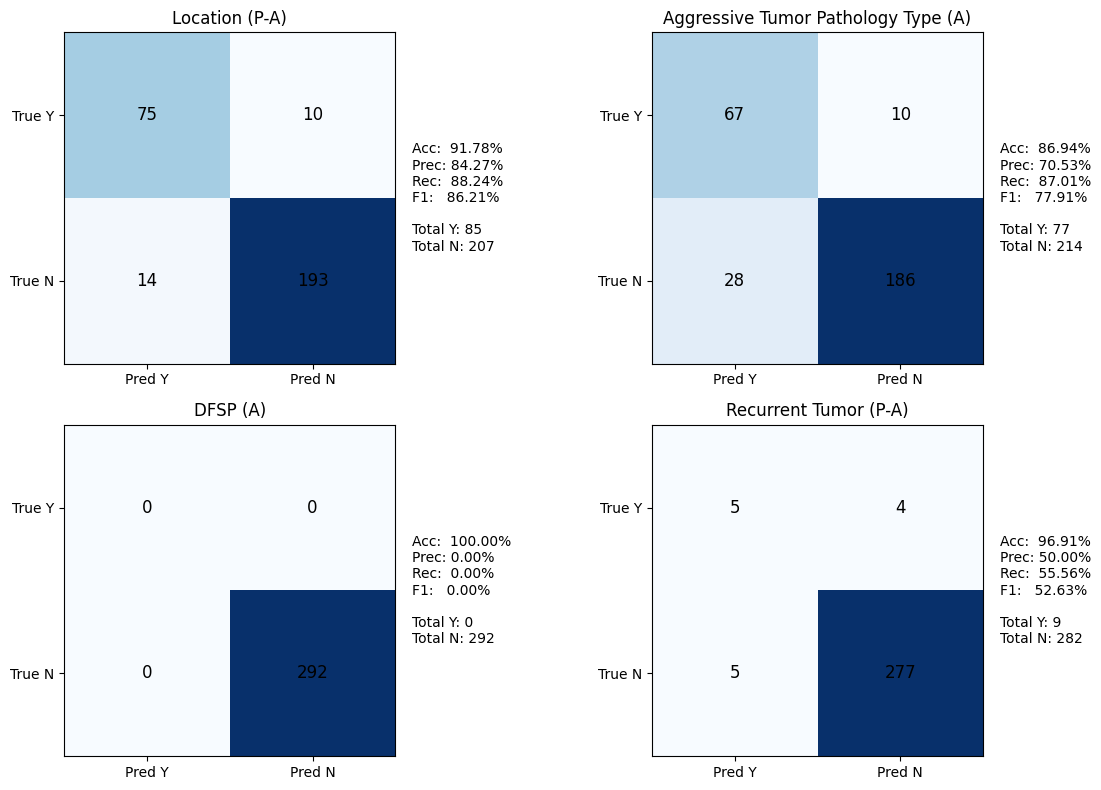

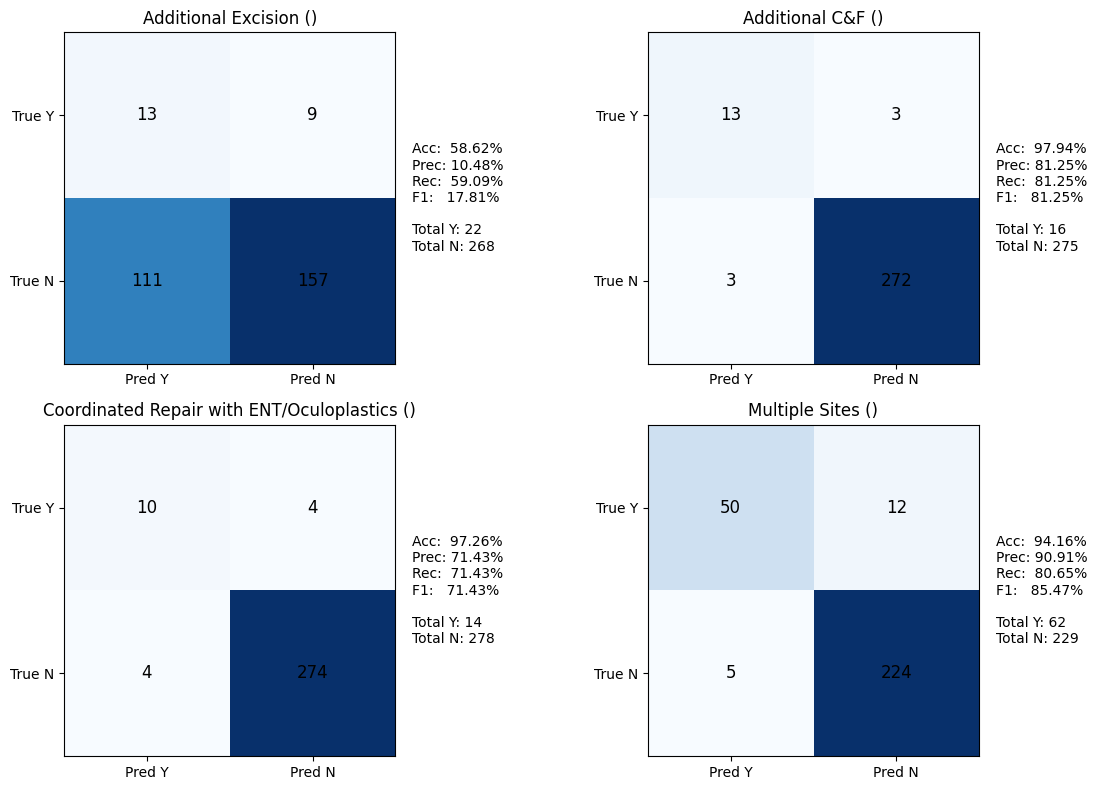

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_block(confusion_matrices, out_filename):
    # Calculate metrics & counts
    for m in confusion_matrices:
        TP, TN, FP, FN = m['TP'], m['TN'], m['FP'], m['FN']
        total = TP + TN + FP + FN
        m['accuracy']  = (TP + TN) / total * 100 if total else 0
        m['precision'] = TP / (TP + FP) * 100 if (TP + FP) else 0
        m['recall']    = TP / (TP + FN) * 100 if (TP + FN) else 0
        m['f1']        = 2 * (m['precision'] * m['recall']) / (m['precision'] + m['recall']) \
                         if (m['precision'] + m['recall']) else 0
        m['total_y']   = TP + FN
        m['total_n']   = TN + FP

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for ax, m in zip(axes, confusion_matrices):
        # Build matrix with True Positive top-left, False Negative top-right,
        # False Positive bottom-left, True Negative bottom-right:
        cm = np.array([[m['TP'], m['FN']],
                       [m['FP'], m['TN']]])
        ax.imshow(cm, cmap='Blues')

        # Annotate each cell
        for (i, j), val in np.ndenumerate(cm):
            ax.text(j, i, val, ha='center', va='center', fontsize=12, color='black')

        # Axes labels & title
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['Pred Y', 'Pred N'])
        ax.set_yticklabels(['True Y', 'True N'])
        ax.set_title(m['label'], fontsize=12)

        # Side text with metrics + total Y/N
        side_text = (
            f"Acc:  {m['accuracy']:.2f}%\n"
            f"Prec: {m['precision']:.2f}%\n"
            f"Rec:  {m['recall']:.2f}%\n"
            f"F1:   {m['f1']:.2f}%\n\n"
            f"Total Y: {m['total_y']}\n"
            f"Total N: {m['total_n']}"
        )
        ax.text(1.05, 0.5, side_text, transform=ax.transAxes,
                fontsize=10, va='center', ha='left')

    plt.tight_layout()
    plt.savefig(out_filename, dpi=300, bbox_inches='tight')
    plt.show()


# First block of 4
confusion_matrices_1 = [
    {'label': 'Location (P-A)', 'TP': 75, 'TN': 193, 'FP': 14, 'FN': 10},
    {'label': 'Aggressive Tumor Pathology Type (A)', 'TP': 67, 'TN': 186, 'FP': 28, 'FN': 10},
    {'label': 'DFSP (A)', 'TP': 0, 'TN': 292, 'FP': 0, 'FN': 0},
    {'label': 'Recurrent Tumor (P-A)', 'TP': 5, 'TN': 277, 'FP': 5, 'FN': 4},
]
plot_confusion_block(confusion_matrices_1, "confusion_block_1.png")

# Second block of 4
confusion_matrices_2 = [
    {'label': 'Additional Excision ()', 'TP': 13, 'TN': 157, 'FP': 111, 'FN': 9},
    {'label': 'Additional C&F ()', 'TP': 13, 'TN': 272, 'FP': 3, 'FN': 3},
    {'label': 'Coordinated Repair with ENT/Oculoplastics ()', 'TP': 10, 'TN': 274, 'FP': 4, 'FN': 4},
    {'label': 'Multiple Sites ()', 'TP': 50, 'TN': 224, 'FP': 5, 'FN': 12},
]
plot_confusion_block(confusion_matrices_2, "confusion_block_2.png")